## ICE-6 Color features and histogram
Please download the following images for the ICE-6:<br>
https://drive.google.com/file/d/136KacYJQZ3ShMSDndqgzohTlTPrfKuma/view?usp=sharing

## (Tutorial) Dominant colors
Please refer to the following link to learn how to extract dominant colors of a given image:<br>
https://www.dataquest.io/blog/tutorial-colors-image-clustering-python/

## Example 1. Extracting dominant colors

In [1]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2

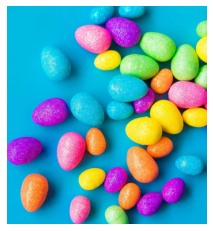

In [2]:
# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
image = cv2.imread("eggs.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure()
plt.axis("off")
plt.imshow(image)

In [3]:
# reshape the image to proper version for the following processing
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [4]:
# cluster the pixel intensities
clt = KMeans(n_clusters = 10)
clt.fit(image)

KMeans(n_clusters=10)

In [5]:
# import the necessary packages
import numpy as np
import cv2
def centroid_histogram(clt):
# grab the number of different clusters and create a histogram
# based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
# normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
# return the histogram
    return hist

In [6]:
def plot_colors(hist, centroids):
# initialize the bar chart representing the relative frequency
# of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
# loop over the percentage of each cluster and the color of
# each cluster
    for (percent, color) in zip(hist, centroids):
# plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX

# return the bar chart
    return bar

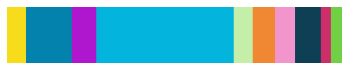

In [7]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

## (Tutorial) Within-Cluster Sum of Square (wcss) and Elbow method
Please refer to the following link to learn Elbow method for optimal number of clusters selecting:<br>
https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

## Task 1. Using the Elbow method to select the optimal number of clusters for the three images in your downloaded zip file
1. Selecting the optimal number of clusters using Elbow method
2. Visualizing the histogram of clusters as shown in example 1 with the optimal number of clusters

In [ ]:
# write you code here


## Question 1. According to the Elbow method, how to choose the optimal number of clusters?

**Answer to Q1**: type your answer here


---

## (Tutorial) Histogram Equalization
Please refer to the following link to learn the histogram equalization:<br>
https://medium.com/@kyawsawhtoon/a-tutorial-to-histogram-equalization-497600f270e2 <br> and 
https://hypjudy.github.io/2017/03/19/dip-histogram-equalization/

## Example 2. Histogram equalization on gray image

In [8]:
img = cv2.imread('Nepal.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Original image', img)
cv2.imshow('Gray map', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

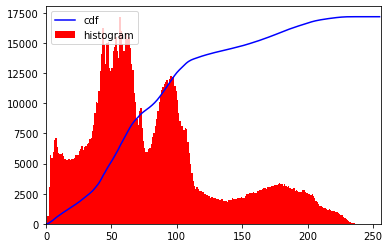

In [9]:
hist,bins = np.histogram(gray.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [10]:
equ = cv2.equalizeHist(gray)
cv2.imshow('equ.png',equ)
cv2.waitKey(0)
cv2.destroyAllWindows()

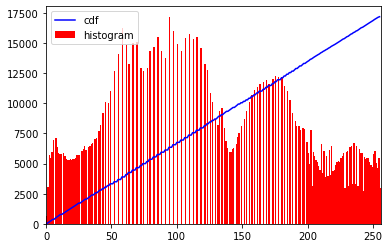

In [11]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Task 2. Histogram equalization on color images
1. Apply histogram equalization on the 3 downloaded images
2. Visualize the histograms and the cumulative summation before and after histogram equalization
3. Show the images before and after histogram equalization

In [ ]:
# write your code here


## Question 2. Why don't we apply histogram equalization on each color channel separately to implement histogram equalization on color images?

**Answer to Q2**: type your answer here


---